# Informations about the dataset

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")

from experiments.data.load_data_util import load_data

data = load_data('../data')
data.head(3)

,,plugin1,plugin2,plugin3,plugin4,plugin5,plugin6
id,name,,,,,,
5299,plexi*dly*,74,102,55,107,107,107
5300,HB*Boston3,31,102,33,107,107,107
5301,_Clean****,24,31,28,107,107,107


### Total of instances 'None' by position

In [2]:
[data[data[f'plugin{i}'] == 107][f'plugin{i}'].count() for i in range(1, 7)]

[0, 0, 0, 376, 696, 1059]

### Plugins use by position (Frequency by position)

Frequency by position


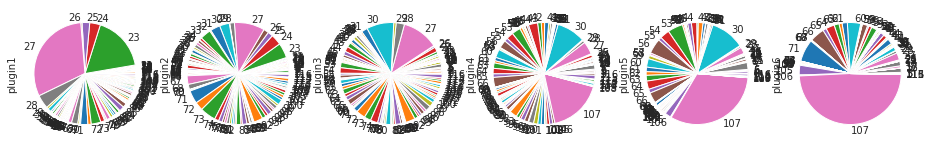

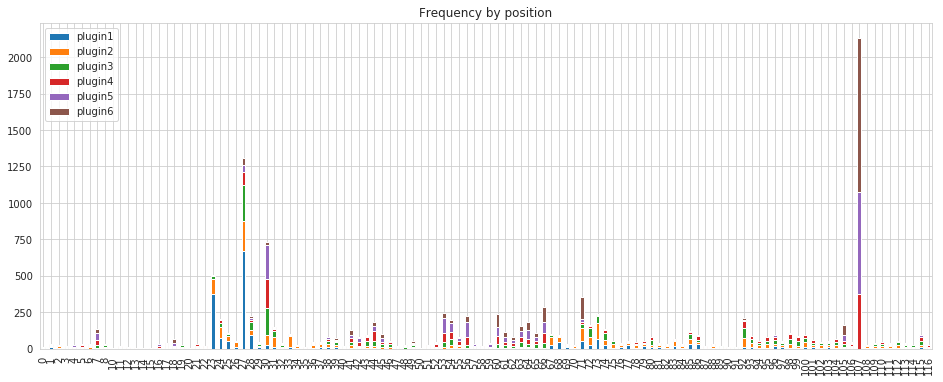

In [3]:
dataframe = pd.DataFrame(data={
    f'plugin{i}': data[f'plugin{i}'].value_counts()
    for i in range(1, 7)
}).fillna(0)

print('Frequency by position')
dataframe.plot.pie(subplots=True, legend=False, figsize=(16, 6));
dataframe.plot.bar(stacked=True, figsize=(16, 6), title='Frequency by position');

### Total of instances for each plugin

(show  50 plugins in the graph)
Five most used


,count,frequency
107,2131,0.164353
27,1307,0.100802
30,735,0.056687
23,508,0.039179
71,355,0.027379


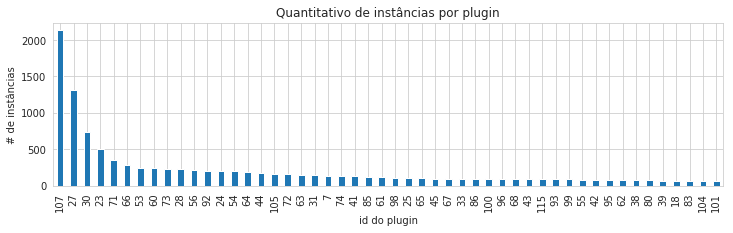

In [6]:
plugins = [data[column] for column in data.columns]

plugins_use = pd.concat(plugins).value_counts()
plugins_use.name = 'total'

ax = plugins_use[plugins_use > 60].plot.bar(figsize=(12, 3), title='Quantitativo de instâncias por plugin')
ax.set_xlabel('id do plugin')
ax.set_ylabel('# de instâncias')

ax.get_figure().savefig('output/instances-distribution.pdf', bbox_inches='tight')
print('(show ', plugins_use[plugins_use > 60].shape[0], 'plugins in the graph)')

print('Five most used')
pd.DataFrame({'count': plugins_use, 'frequency': plugins_use/plugins_use.sum()}).head()



Text(0, 0.5, 'CDF')

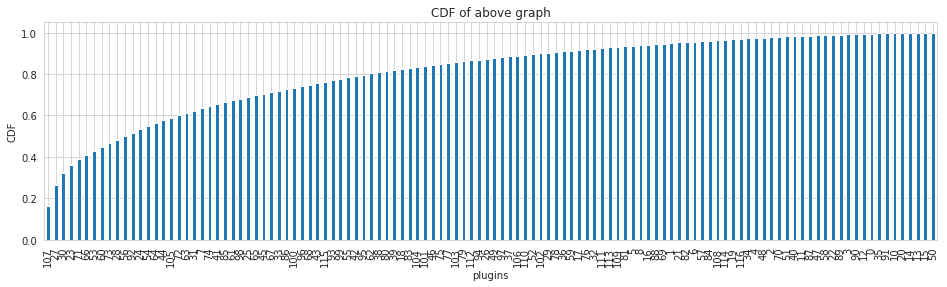

In [5]:
frame = pd.DataFrame({'plugins': plugins_use, 'cdf': np.cumsum(plugins_use) / plugins_use.sum()})
ax = frame['cdf'].plot.bar(title='CDF of above graph', figsize=(16, 4))
ax.set_xlabel('plugins')
ax.set_ylabel('CDF')

### Total of plugins by category (not instances)

In [9]:
plugins_categories = pd.read_csv('../data/plugins_categories_simplified.csv', sep=",", index_col=['id'])
plugins_categories.groupby('category').count()

,name
category,
Amp,28
Combination Fx,7
Delay,12
Dynamics,7
Filter_EQ,10
Modulation,22
None,1
Pedal Fx,4
Reverb,8


In [31]:
pc = plugins_categories.sort_index()

number_by_page = 20

pc1 = pc[pc.index < number_by_page]
pc2 = pc[(pc.index >= number_by_page) & (pc.index < number_by_page*2)]
pc3 = pc[(pc.index >= number_by_page*2) & (pc.index < number_by_page*3)]


page1 = pd.concat([pc1, pc2.reset_index(), pc3.reset_index()], axis=1)
page1.to_latex('output/plugins-categories-1.latex')
page1

,name,category,id,name,category,id,name,category
0,M-Filter,Filter_EQ,20,Comp+AWah,Combination Fx,40,RingMod,Modulation
1,TheVibe,Modulation,21,FLG+VCho,Combination Fx,41,Chorus,Modulation
2,Z-Organ,SFX,22,Comp+OD,Combination Fx,42,Detune,Modulation
3,Slicer,Modulation,23,Comp,Dynamics,43,VintageCE,Modulation
4,PhaseDly,Delay,24,RackComp,Dynamics,44,StereoCho,Modulation
5,FilterDly,Delay,25,M Comp,Dynamics,45,Ensemble,Modulation
6,PitchDly,Delay,26,SlowATTCK,Dynamics,46,VinFLNGR,Modulation
7,StereoDly,Delay,27,ZNR,Dynamics,47,DynaFLNGR,Modulation
8,BitCrush,Modulation,28,NoiseGate,Dynamics,48,Vibrato,Modulation
9,Bomber,SFX,29,DirtyGate,Dynamics,49,PitchSHFT,Modulation


In [37]:
pc4 = pc[(pc.index >= number_by_page*3) & (pc.index < number_by_page*4)]
pc5 = pc[(pc.index >= number_by_page*4) & (pc.index < number_by_page*5)]
pc6 = pc[(pc.index >= number_by_page*5)]

page2 = pd.concat([pc4.reset_index(), pc5.reset_index(), pc6.reset_index()], axis=1)
page2.to_latex('output/plugins-categories-2.latex', index=False)
page2

,id,name,category,id,name,category,id,name,category
0,60,Hall,Reverb,80,MetalWRLD,Stomp,100.0,BG DRIVE,Amp
1,61,Room,Reverb,81,HotBox,Stomp,101.0,DZ DRIVE,Amp
2,62,TiledRoom,Reverb,82,Z Wild,Stomp,102.0,TW ROCK,Amp
3,63,Spring,Reverb,83,Lead,Stomp,103.0,MATCH 30,Amp
4,64,Arena,Reverb,84,ExtremeDS,Stomp,104.0,FD VIBRO,Amp
5,65,EarlyRef,Reverb,85,Aco.Sim,Stomp,105.0,HD Reverb,Reverb
6,66,Air,Reverb,86,Z Clean,Amp,106.0,Flanger,Modulation
7,67,PedalVx,Pedal Fx,87,Z MP1,Amp,107.0,None,None
8,68,PedalCry,Pedal Fx,88,Z Bottom,Amp,108.0,TONE CITY,Amp
9,69,PDL Pitch,Pedal Fx,89,Z Dream,Amp,109.0,B-BREAKER,Amp


### Total of instances by category

,total,frequency
category,,
Amp,1678.0,0.129415
Combination Fx,225.0,0.017353
Delay,1069.0,0.082446
Dynamics,2451.0,0.189033
Filter_EQ,1140.0,0.087922
Modulation,1168.0,0.090082
None,2131.0,0.164353
Pedal Fx,248.0,0.019127
Reverb,1320.0,0.101805


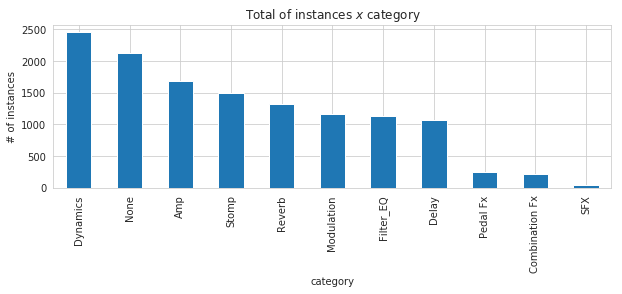

In [7]:
#plugins_categories.join(plugins_use.to_frame()).head()
plugins_categories_sum = plugins_categories.join(plugins_use.to_frame()).groupby('category').sum()
plugins_categories_sum['frequency'] = plugins_categories_sum/plugins_categories_sum.sum()

ax = plugins_categories_sum.sort_values('total', ascending=False)['total'].plot.bar(figsize=(10, 3), title='Total of instances $x$ category')
ax.set_ylabel('# of instances')

plugins_categories_sum

# The following code is a try to create a database with less plugins use

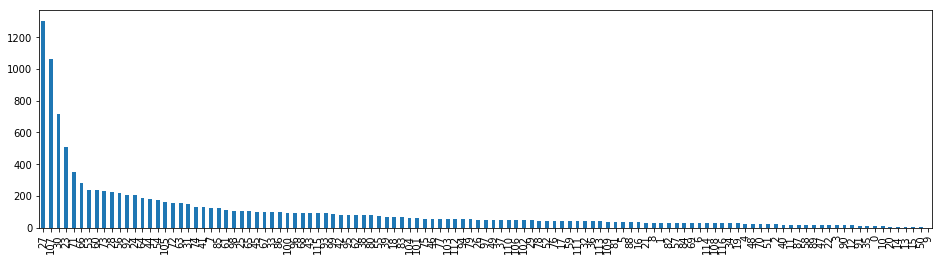

In [9]:
plugins = [(i, (data == (i, ) * 6).any(axis=1).sum()) for i in range(0, 117)]

plugins_frenquencies = pd.DataFrame(plugins, columns=['id', 'total']).sort_values('total', ascending=False)

plugins_frenquencies['total'].plot.bar(figsize=(16, 4))

In [10]:
from functools import reduce

plugins_use = []

for i, plugin in plugins_frenquencies.sort_values('total', ascending=True).iterrows():
    plugins_use.append((i, data == ((i, ) * 6)))

use = []
last = None
for i, plugin_use in plugins_use:
    if last is None:
        last = plugin_use.copy()
    
    last |= plugin_use
    use.append((i, last.any(axis=1).sum()))

use = pd.DataFrame(use, columns=['id', 'cumulative_use'])
use['cdf'] = use['cumulative_use'] / data.shape[0]

use.index = use['id']

use.head()

,id,cumulative_use,cdf
id,,,
9,9,0,0.000000
50,50,4,0.001851
15,15,9,0.004165
13,13,14,0.006478
14,14,19,0.008792


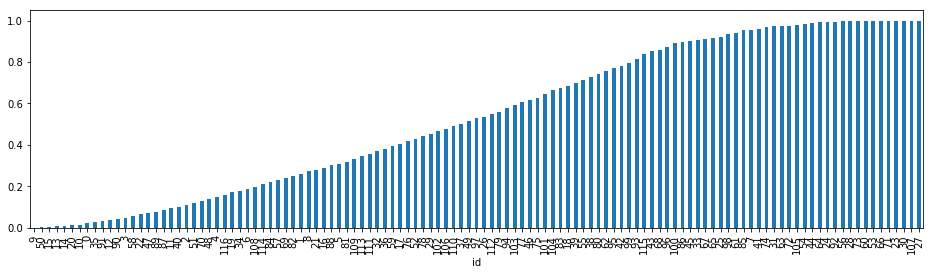

In [11]:
use['cdf'].plot.bar(figsize=(16, 4))

In [12]:
# Remove 50%
total = len(plugins_use)
remove = total/2
use = plugins_use[0][-1].copy()

for i, plugin_use in plugins_use:
    if total < remove:
        break

    use |= plugin_use
    total -= 1

print("Total of patches:", use.any(axis=1).sum())

Total of patches: 1145


In [13]:
filtered_data = data[use.any(axis=1) == False]
remain_plugins = np.unique(filtered_data.values)

for new_id, old_id in enumerate(remain_plugins):
    filtered_data = filtered_data.replace(old_id, new_id)

print('Total of plugins', len(remain_plugins))
remain_plugins_map = pd.DataFrame(remain_plugins)
remain_plugins_map = remain_plugins_map.reset_index()
remain_plugins_map.columns = ['new_id', 'original_id']

remain_plugins_map.head(3)

Total of plugins 58


,new_id,original_id
0,0,7.0
1,1,18.0
2,2,23.0


In [14]:
filtered_data.head()

,,plugin1,plugin2,plugin3,plugin4,plugin5,plugin6
id,name,,,,,,
5301,_Clean****,3.0,9.0,7.0,55.0,55.0,55.0
5350,AC*DC*****,7.0,52.0,24.0,55.0,55.0,55.0
5358,DearPruden,47.0,14.0,21.0,55.0,55.0,55.0
5359,PaganBaby*,50.0,27.0,30.0,55.0,55.0,55.0
5360,WalkOnWate,47.0,27.0,30.0,55.0,55.0,55.0


In [15]:
filtered_data.to_csv('../data/patches-filtered-filtered.csv')

In [16]:
plugins_categories = pd.read_csv(f'../data/plugins_categories_simplified.csv', sep=",", index_col=['id'])

copy = remain_plugins_map.copy()
copy.index = copy['original_id']

#remain_plugins_map#.to_csv('../data/patches-filtered-filtered.csv')
plugins_categories #.iloc[remain_plugins_map[0].values]
#remain_plugins_map#[0].values
plugins_categories_small = plugins_categories.join(copy)
plugins_categories_small = plugins_categories_small[plugins_categories_small['new_id'].isna() == False]
plugins_categories_small.index = plugins_categories_small['new_id']
plugins_categories_small.index.name = 'id'
del plugins_categories_small['new_id']
del plugins_categories_small['original_id']
plugins_categories_small.index = plugins_categories_small.index.astype(np.int32)

plugins_categories_small.to_csv('../data/plugins_categories_simplified_simplified.csv')
plugins_categories_small.head(5)

,name,category
id,,
2,Comp,Dynamics
3,RackComp,Dynamics
4,M Comp,Dynamics
5,SlowATTCK,Dynamics
6,ZNR,Dynamics
